In [1]:
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.2 MB/s eta 0:00:00a 0:00:01


In [2]:
import ultralytics

from ultralytics import YOLO
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

ultralytics.checks()

Ultralytics 8.3.105 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6170.1/8062.4 GB disk)


In [3]:
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 244MB/s]


In [4]:
Root_dir = '/kaggle/input/chess-pieces-object-detection-with-black-and-white'
yaml_path = os.path.join(Root_dir, 'data.yaml')

In [5]:
results = model.train(
    data=yaml_path,
    epochs=50,
    batch=64,
    perspective=0.001,
    lr0=0.01,
    lrf=0.01,
    cos_lr=True,
    dropout=0.4,
    imgsz=640,
    plots= True,
    device=[0, 1]
)

Ultralytics 8.3.105 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/chess-pieces-object-detection-with-black-and-white/data.yaml, epochs=50, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.4, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

In [6]:
out_model=YOLO('/kaggle/working/runs/detect/train/weights/best.pt')


image 1/1 /kaggle/input/chess-pieces-object-detection-with-black-and-white/train/images/3774967f-d7d4-409e-b66e-372659af20d6.jpg: 640x640 2 black-bishops, 1 black-king, 2 black-pawns, 1 white-bishop, 1 white-king, 1 white-pawn, 37.0ms
Speed: 4.2ms preprocess, 37.0ms inference, 195.3ms postprocess per image at shape (1, 3, 640, 640)


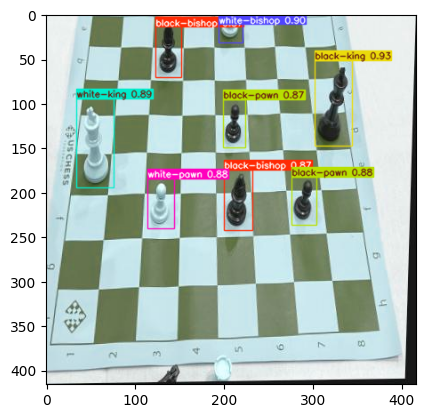

In [7]:
image_test_path = '/kaggle/input/chess-pieces-object-detection-with-black-and-white/train/images/3774967f-d7d4-409e-b66e-372659af20d6.jpg'

results = out_model.predict(source=image_test_path,
                        imgsz=640)

test_image = results[0].plot(line_width=1)
plt.imshow(test_image)